<a href="https://colab.research.google.com/github/ShubhamShaswat/Imdb-Review/blob/master/imdb_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.preprocessing import text,sequence
from tensorflow import keras
from tqdm import tqdm
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [2]:
imdb=keras.datasets.imdb
(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


In [3]:
word_index=imdb.get_word_index()

#with index reserve
word_index={k:v+3 for k,v in word_index.items()}
word_index['<PAD>'] = 0
word_index['<START>'] = 1
word_index['<UNK>']=2
word_index['<UNUSED>']=3

def reverse(val):
  for k,v in word_index.items():
    if val==v:
      return k

def decode(text):
  return ' '.join(reverse(i) for i in text)
    

1646592/1641221 [==============================] - 0s 0us/step


In [0]:
import requests, zipfile, io
r = requests.get('http://nlp.stanford.edu/data/glove.840B.300d.zip')
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [0]:
def load_embedding(PATH):
  embedding_index={}
  with open(PATH) as f:
    for line in tqdm(f):
      val=line.strip().split(' ')
      embedding_index[val[0]]=np.asarray(val[1:],dtype=np.float32)
  return embedding_index

def load_matrix(word_index,PATH):
  embedding_matrix=np.ones((len(word_index)+1,300))
  embedding_index=load_embedding(PATH)
  for word,i in tqdm( word_index.items()):
    
    try:
      embedding_matrix[i]=embedding_index[word]
    except KeyError:
      pass
    
  del embedding_index
  
  return embedding_matrix
      
      
      

88588

In [0]:


PATH='glove.840B.300d.txt'
embedding_matrix=load_matrix(word_index,PATH)


2196017it [03:27, 10565.02it/s]
100%|██████████| 88588/88588 [00:00<00:00, 284588.06it/s]


In [0]:
x_train=sequence.pad_sequences(x_train,value=word_index['<PAD>'],padding='post',maxlen=256)
x_test=sequence.pad_sequences(x_test,value=word_index['<PAD>'],padding='post',maxlen=256)

In [0]:
VOCAB_SIZE=10000
def build_model(embedding_matrix):
  
  model=keras.Sequential()
  model.add(keras.layers.Embedding(*embedding_matrix.shape,weights=[embedding_matrix]))
  #model.add(keras.layers.LSTM(256))
  model.add(keras.layers.GlobalAveragePooling1D())
  model.add(keras.layers.Dense(16,activation=tf.nn.relu))
  model.add(keras.layers.Dropout(0.3))
  model.add(keras.layers.Dense(1,activation=tf.nn.sigmoid))

  return model

In [0]:
model=build_model(embedding_matrix)
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 300)         26576700  
_________________________________________________________________
lstm_4 (LSTM)                (None, 256)               570368    
_________________________________________________________________
dense_10 (Dense)             (None, 16)                4112      
_________________________________________________________________
dropout_4 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 17        
Total params: 27,151,197
Trainable params: 27,151,197
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])



In [0]:
x_val=x_train[:10000]
y_val=y_train[:10000]

x_train=x_train[10000:]
y_train=y_train[10000:]

In [0]:
history=model.fit(x_train,y_train,epochs=4,batch_size=512,validation_data=[x_val,y_val],verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
14336/15000 [===========================>..] - ETA: 15s - loss: 0.6955 - acc: 0.5144

KeyboardInterrupt: ignored

In [0]:
model.evaluate(x_test,y_test)

25000/25000 [==============================] - 3s 112us/sample - loss: 0.3234 - acc: 0.8692


[0.3233597199869156, 0.8692]

In [0]:
acc=history.history['acc']
val_acc=history.history['val_acc']

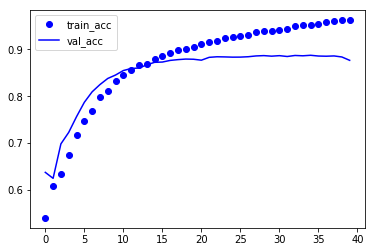

In [0]:
plt.plot(acc,'bo',label='train_acc')
plt.plot(val_acc,'b',label='val_acc')
plt.legend()
plt.show()